## 상관관계가 있는 경우의 이상값
- 예) 범주형-연속형의 경우
- 한 변수가 다른 변수와 유의한 상관관계가 있을 때 -> 관계를 고려해 이상값 식별, 통계 분석
> 변수들 간의 관계를 조사함으로써 이상값과 예상치 못한 값을 식별

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

covidtotals=pd.read_csv('C:/data-cleansing-main/Chapter04/data/covidtotals.csv')
covidtotals.set_index('iso_code',inplace=True)
totvars = ['location','total_cases','total_deaths','total_cases_pm','total_deaths_pm']
demovars = ['population','pop_density','median_age','gdp_per_capita','hosp_beds']

### 누적 및 인구통계 열에 대한 상관행렬 생성

In [2]:
covidtotals.corr(method='pearson')

C:\Users\victo\AppData\Local\Temp\ipykernel_8104\1181257056.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covidtotals.corr(method='pearson')


,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
total_cases,1.000000,0.932079,0.182246,0.247464,0.270030,-0.028737,0.162698,0.186835,0.027601
total_deaths,0.932079,1.000000,0.179812,0.394811,0.212619,-0.031645,0.205128,0.198729,0.019990
total_cases_pm,0.182246,0.179812,1.000000,0.586468,-0.056009,0.110043,0.313836,0.651200,0.081449
total_deaths_pm,0.247464,0.394811,0.586468,1.000000,-0.013902,0.030281,0.389595,0.383672,0.120488
population,0.270030,0.212619,-0.056009,-0.013902,1.000000,-0.023084,0.024395,-0.059555,-0.038329
pop_density,-0.028737,-0.031645,0.110043,0.030281,-0.023084,1.000000,0.178878,0.315199,0.314973
median_age,0.162698,0.205128,0.313836,0.389595,0.024395,0.178878,1.000000,0.648905,0.662222
gdp_per_capita,0.186835,0.198729,0.651200,0.383672,-0.059555,0.315199,0.648905,1.000000,0.296995
hosp_beds,0.027601,0.019990,0.081449,0.120488,-0.038329,0.314973,0.662222,0.296995,1.000000


### qcut을 이용해 데이터를 분위수로 나눈 열을 생성

In [6]:
# 총 확진자 수에 비해 총 사망자 수가 예상을 벗어나는 국가가 있는지 확인
covidtotalsonly=covidtotals.loc[:,totvars]
covidtotalsonly['total_cases_q']=pd.qcut(covidtotalsonly['total_cases'],
                                         labels=['very low','low','medium','high','very high'],
                                         q=5,precision=0)

covidtotalsonly['total_deaths_q']=pd.qcut(covidtotalsonly['total_deaths'],
                                         labels=['very low','low','medium','high','very high'],
                                         q=5,precision=0)

In [7]:
covidtotalsonly

,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm,total_cases_q,total_deaths_q
iso_code,,,,,,,
AFG,Afghanistan,15205,257,390.589,6.602,high,high
ALB,Albania,1137,33,395.093,11.467,medium,medium
DZA,Algeria,9394,653,214.225,14.891,high,very high
AND,Andorra,764,51,9888.048,660.066,medium,medium
AGO,Angola,86,4,2.617,0.122,very low,low
...,...,...,...,...,...,...,...
VNM,Vietnam,328,0,3.370,0.000,low,very low
ESH,Western Sahara,23,1,38.505,1.674,very low,very low
YEM,Yemen,323,80,10.829,2.682,low,high


### 크로스탭
- 범주형 데이터 2개를 비교분석
- 교차분석표: 각 범주형 데이터의 개수를 행과 열로 cross 해놓은 표

In [13]:
# 총사망자 분위수별 총확진자 분위수의 크로스탭 표시
pd.crosstab(covidtotalsonly.total_cases_q,covidtotalsonly.total_deaths_q)       # normalize='all' / 'index' / 'columns' 비율로 알려줌

total_deaths_q,very low,low,medium,high,very high
total_cases_q,,,,,
very low,34,7,1,0,0
low,12,19,10,1,0
medium,1,13,15,13,0
high,0,0,12,24,6
very high,0,0,2,4,36


In [19]:
covidtotals.loc[(covidtotalsonly.total_cases_q=='very high') & (covidtotalsonly.total_deaths_q=='medium')].T        # cross tab에서 대각선에 맞지 않는 국가들 살펴보기
# 확진자 수는 매우 높지만, 사망자 수가 중간인 국가

iso_code,QAT,SGP
lastdate,2020-06-01,2020-06-01
location,Qatar,Singapore
total_cases,56910,34884
total_deaths,38,23
total_cases_pm,19753.146,5962.727
total_deaths_pm,13.19,3.931
population,2881060.0,5850343.0
pop_density,227.322,7915.731
median_age,31.9,42.4
gdp_per_capita,116935.6,85535.383


In [20]:
covidtotals.loc[(covidtotalsonly.total_cases_q=='low') & (covidtotalsonly.total_deaths_q=='high')].T        # 확진자 수는 낮지만, 사망자 수가 많은 국가

iso_code,YEM
lastdate,2020-06-01
location,Yemen
total_cases,323
total_deaths,80
total_cases_pm,10.829
total_deaths_pm,2.682
population,29825968.0
pop_density,53.508
median_age,20.3
gdp_per_capita,1479.147


### 산점도 그리기
- 총 확진자 수와 총 사망자 수의 산점도를 그림
- seaborn의 regplot 이용 -> 회귀직선을 추가하여 그리기
- regplot: 산점도 + 그래프

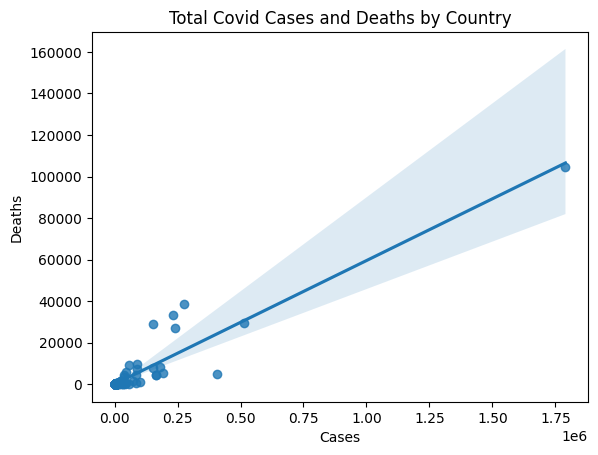

In [22]:
ax=sns.regplot(x='total_cases',y='total_deaths',data=covidtotals)
ax.set(xlabel="Cases",ylabel="Deaths",title="Total Covid Cases and Deaths by Country")
plt.show()

- 회귀직선 위, 아래의 예상치 못한 값 조사

In [24]:
# 확진자 수가 300,000명 미만이면서 사망자 수가 20,000명을 넘는 나라가 네 곳 있다.
covidtotals.loc[(covidtotalsonly['total_cases']<300000) & (covidtotalsonly['total_deaths']>20000)].T

iso_code,FRA,ITA,ESP,GBR
lastdate,2020-06-01,2020-06-01,2020-05-31,2020-06-01
location,France,Italy,Spain,United Kingdom
total_cases,151753,233019,239429,274762
total_deaths,28802,33415,27127,38489
total_cases_pm,2324.879,3853.985,5120.952,4047.403
total_deaths_pm,441.251,552.663,580.197,566.965
population,65273512.0,60461828.0,46754783.0,67886004.0
pop_density,122.578,205.859,93.105,272.898
median_age,42.0,47.9,45.5,40.8
gdp_per_capita,38605.671,35220.084,34272.36,39753.244


In [27]:
# 확진자 수가 300,000명이 넘는데도 사망자 수가 10,000명 미만인 나라가 있다.
covidtotals.loc[(covidtotalsonly['total_cases']>300000) & (covidtotalsonly['total_deaths']<10000)].T

iso_code,RUS
lastdate,2020-06-01
location,Russia
total_cases,405843
total_deaths,4693
total_cases_pm,2780.995
total_deaths_pm,32.158
population,145934460.0
pop_density,8.823
median_age,39.6
gdp_per_capita,24765.954


- 백만 명당 확진자수와 사망자 수를 나타내는 산점도 그리기

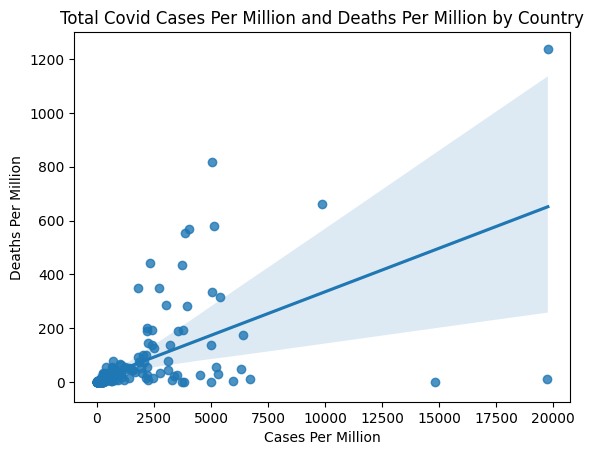

In [28]:
ax=sns.regplot(x="total_cases_pm",y="total_deaths_pm",data=covidtotals)
ax.set(xlabel="Cases Per Million",ylabel="Deaths Per Million",title="Total Covid Cases Per Million and Deaths Per Million by Country")
plt.show()

### 회귀직선 외에 속하는 곳 조사

In [30]:
print(covidtotals.loc[(covidtotals.total_cases_pm<7500) & (covidtotals.total_deaths_pm>250),['location','total_cases_pm','total_deaths_pm']])
print(covidtotals.loc[(covidtotals.total_cases_pm>5000) & (covidtotals.total_deaths_pm<=50),['location','total_cases_pm','total_deaths_pm']])

                           location  total_cases_pm  total_deaths_pm
iso_code                                                            
BEL                         Belgium        5037.354          816.852
FRA                          France        2324.879          441.251
IRL                         Ireland        5060.962          334.562
IMN                     Isle of Man        3951.454          282.247
ITA                           Italy        3853.985          552.663
JEY                          Jersey        3047.302          286.921
NLD                     Netherlands        2710.379          347.595
SXM       Sint Maarten (Dutch part)        1795.625          349.797
ESP                           Spain        5120.952          580.197
SWE                          Sweden        3717.298          435.180
GBR                  United Kingdom        4047.403          566.965
USA                   United States        5408.389          315.354
           location  total_cases_p

## 정리
corr로 변수별 상관행렬 -> qcut으로 분위수별로 데이터 나누기 -> cross tab으로 범주형 변수끼리 비교 -> 시본의 regplot으로 산점도+회귀직선 그리기 -> 회귀직선에서 벗어나는 국가 조사